In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv('titanic_dataset.csv', usecols=['Age','Fare','Survived'] )
df.sample(5)

,Survived,Age,Fare
355,0,50.0,26.0000
108,0,NaN,8.7125
413,0,NaN,8.0500
38,0,25.0,9.5000
178,1,36.0,39.0000


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Age       332 non-null    float64
 2   Fare      417 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.9 KB


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Age'].fillna(df['Fare'].mean())

df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
df.sample()

,Survived,Age,Fare
222,1,22.0,22.0


In [7]:
df.shape

(418, 3)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),df.Survived, random_state=7, test_size = 0.2)

In [9]:
X_train.shape

(334, 2)

In [10]:
X_test.shape

(84, 2)

In [11]:
print(X_train['Fare'])
print(X_train['Fare'].dtype)
print(X_train['Fare'].head())

155    24.00000
287    24.00000
300    32.00000
394    29.00000
261    21.00000
         ...   
211    30.27259
67     47.00000
25     50.00000
196     6.00000
175    15.00000
Name: Fare, Length: 334, dtype: float64
float64
155    24.0
287    24.0
300    32.0
394    29.0
261    21.0
Name: Fare, dtype: float64


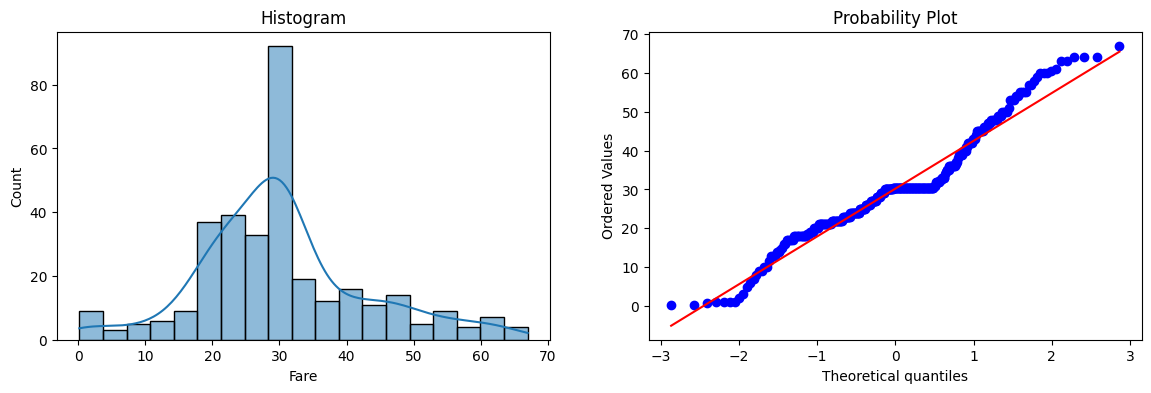

In [23]:
#plt.subplot(rows,colums,index)   
plt.figure(figsize=(14,4))
plt.subplot(1,2,1) #1 row, 2 column, 1 subplot
sns.histplot(X_train['Fare'], kde= True)
plt.title('Histogram')

plt.subplot(1,2,2) #1 row, 2 column, 2 subplot
stats.probplot(X_train['Fare'], dist = 'norm',plot=plt)

plt.show()

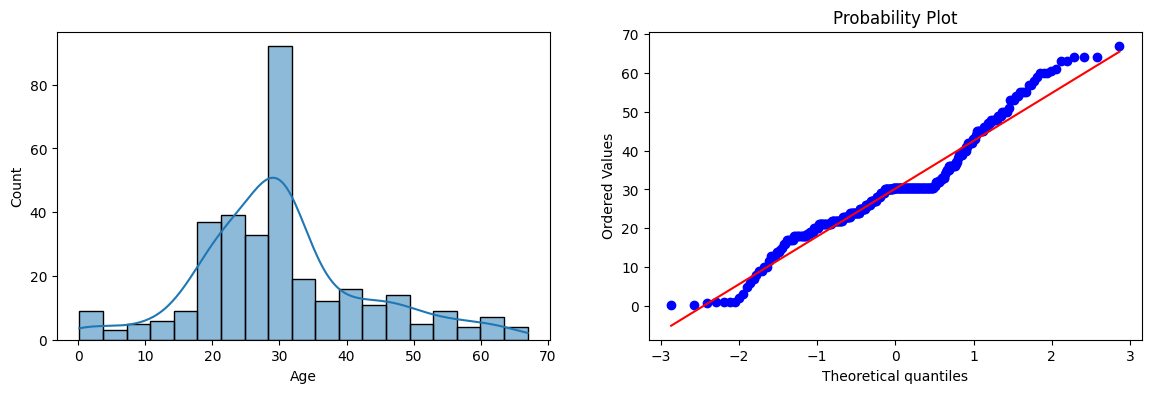

In [26]:
plt.figure(figsize = (14,4))

plt.subplot(1,2,1)
sns.histplot(X_train['Age'],kde=True)

plt.subplot(1,2,2)
stats.probplot(X_train['Age'],dist = 'norm', plot=plt)
plt.show()

In [28]:
clf1 = LogisticRegression()
clf2= DecisionTreeClassifier()

In [31]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2= clf2.predict(X_test)

print("Accuracy Score (LR):", accuracy_score(y_pred1,y_test))
print("Accuracy Score (DTC):", accuracy_score(y_pred2,y_test))

Accuracy Score (LR): 0.6666666666666666
Accuracy Score (DTC): 0.5833333333333334


In [32]:
# using the log transformation on the both and checking the accuracy one again.

In [46]:
trf = FunctionTransformer(func= np.log1p)
# trf = FunctionTransformer(func= np.reciprocal) np.sqrt np.square

In [47]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [48]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed, y_train)

y_pred1 = clf1.predict(X_test_transformed)
y_pred2= clf2.predict( X_test_transformed )

print("Accuracy Score after  log transformation(LR): ", accuracy_score(y_pred1,y_test))
print("Accuracy Score after  log transformation(DTR): ", accuracy_score(y_pred2,y_test))

Accuracy Score after  log transformation(LR):  0.6428571428571429
Accuracy Score after  log transformation(DTR):  0.5952380952380952


In [ ]:
# here the accuracy decreases by using the log transformation in logistic regression
# because, the data was almost normally distributed. hence, log distorted the data

# however, no changes in the DTC

# no change in data can be obsearved using square, sqrt and reciprocal transformation

####  We can do Cross Validation Score to improve